In [12]:
import numpy as np
import pandas as pd
!pip install yfinance

In [9]:
# fetch and summarize etfs data

import yfinance as yf

etfs = ['SPY', 'BND', 'QQQ', 'GLD', 'IWM', 'VEU', 'VNQ']
start_date = '2021-01-01'
end_date = '2026-01-01'

etf_data = yf.download(etfs,start_date,end_date)

etf_data = etf_data['Close']

[*********************100%***********************]  7 of 7 completed


In [10]:
etf_data.head()

Ticker,BND,GLD,IWM,QQQ,SPY,VEU,VNQ
Date,,,,,,,
2021-01-04,77.628716,182.330002,183.599091,301.236206,347.254791,51.463039,70.209351
2021-01-05,77.496468,182.869995,186.436081,303.719635,349.646454,52.252754,70.311874
2021-01-06,77.152725,179.899994,194.064682,299.512390,351.736786,52.533539,70.431488
2021-01-07,76.994057,179.479996,197.518463,306.758148,356.962769,52.717804,70.294785
2021-01-08,76.923531,173.339996,197.091507,310.702454,358.996613,53.463654,70.978333


In [13]:
# Calculate the log return
etf_return = etf_data/etf_data.shift(1)
log_return = np.log(etf_return).dropna()

# Summarize the stats
mean_return = log_return.mean() *252
volatility = log_return.std() * np.sqrt(252)
sharpe_ratio = mean_return / volatility
correlation_matrix = log_return.corr()

summary_stats = pd.DataFrame({
    'mean' : mean_return,
    'volatility' : volatility,
    'sharpe_ratio' : sharpe_ratio
})

In [15]:
summary_stats.head()

,mean,volatility,sharpe_ratio
Ticker,,,
BND,-0.015521,0.062580,-0.248026
GLD,0.117170,0.150326,0.779441
IWM,0.028179,0.234359,0.120240
QQQ,0.125264,0.235587,0.531709
SPY,0.121547,0.177849,0.683430


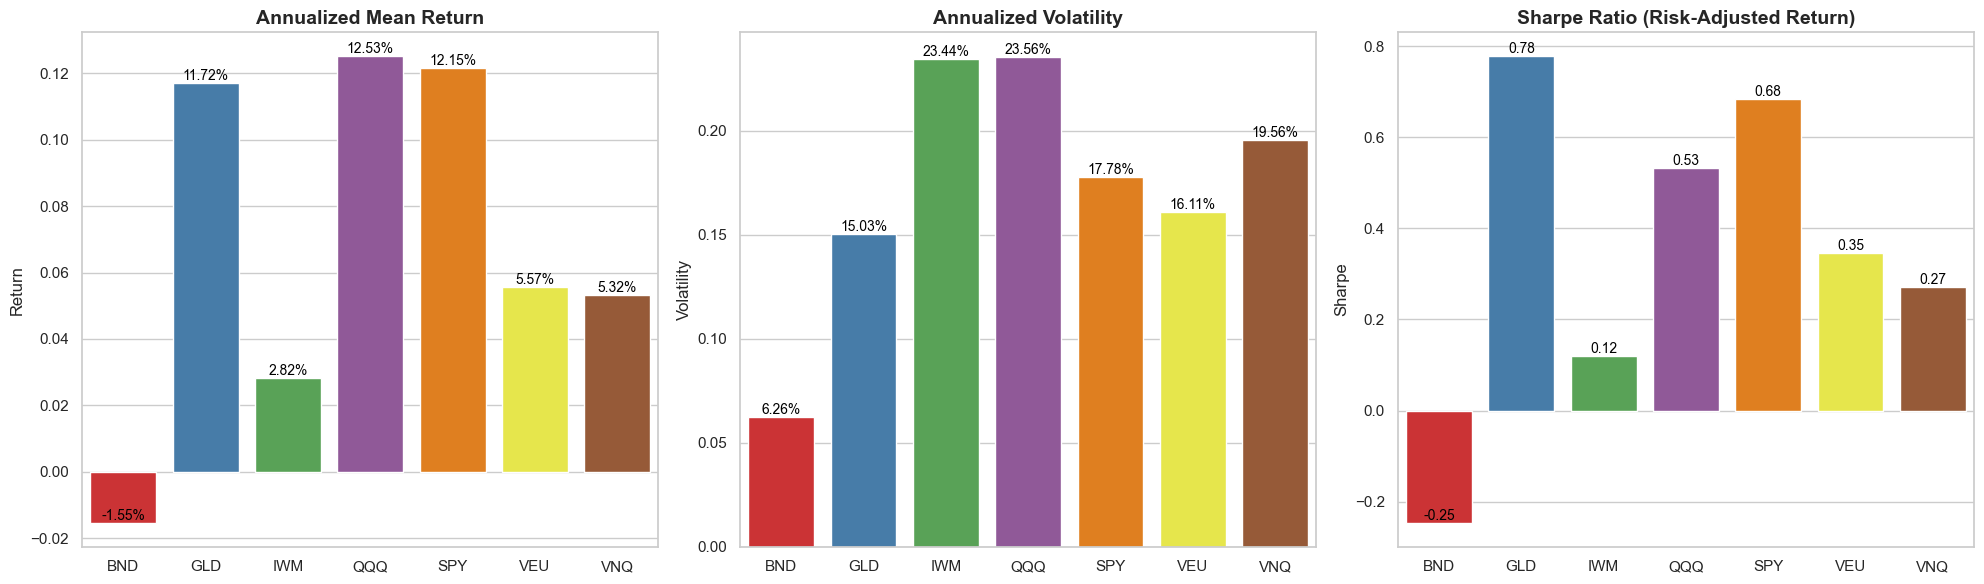

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use 'Ticker' as a column
summary_stats = summary_stats

# Set a clean style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

palette = sns.color_palette("Set1")

# Plot 1: Mean Return
sns.barplot(data=summary_stats, x='Ticker', y='mean', ax=axes[0], palette=palette)
axes[0].set_title('Annualized Mean Return', fontsize=14, weight='bold')
axes[0].set_ylabel('Return')
axes[0].set_xlabel('')
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

# Plot 2: Volatility
sns.barplot(data=summary_stats, x='Ticker', y='volatility', ax=axes[1], palette=palette)
axes[1].set_title('Annualized Volatility', fontsize=14, weight='bold')
axes[1].set_ylabel('Volatility')
axes[1].set_xlabel('')
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

# Plot 3: Sharpe Ratio
sns.barplot(data=summary_stats, x='Ticker', y='sharpe_ratio', ax=axes[2], palette=palette)
axes[2].set_title('Sharpe Ratio (Risk-Adjusted Return)', fontsize=14, weight='bold')
axes[2].set_ylabel('Sharpe')
axes[2].set_xlabel('')
for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    
plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/robo_advisor/figures/summarize_stats_figures.png')

plt.tight_layout()
plt.show()



Mean Return (Expected Annual Return)
- QQQ (12.53%), SPY (12.15%), and GLD (11.72%) were the top performers.
- BND (bonds) actually had a negative mean return, likely due to rising interest rates and inflation.
- IWM (small-cap) underperformed with just 2.82%.

Volatility (Annual Std Dev of Returns)
- QQQ and IWM are the most volatile (~23.5%), typical for tech and small caps.
- SPY has moderate volatility (17.78%)—a blend of sectors.
- BND has the lowest volatility (6.26%)—consistent with bonds being "safer."
- GLD sits in the middle (15.03%), suggesting a moderate risk.

Sharpe Ratio (Risk-Adjusted Return)
This tells us how much return we get per unit of risk (assuming 0% risk-free rate for simplicity).

- GLD has the best Sharpe (0.78) — meaning it delivered the most return for its risk.
- SPY also has a strong Sharpe (0.68) — solid core holding.
- QQQ has high returns but lower Sharpe (0.53) due to high volatility.
- IWM’s Sharpe (0.12) is very poor — taking a lot of risk for low returns.
- BND’s Sharpe is negative, indicating investors were punished for holding it (negative return even though it was low risk).

SPY and GLD are attractive from a risk-return standpoint.
QQQ offers strong growth, but with higher volatility.
BND likely needs to be used only for ultra-conservative users, and even then sparingly given recent macro trends.
IWM is highly volatile with poor performance — only suitable for high-risk clients with long horizons.